<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
  <IMG SRC = "https://www.corrosionalliance.com/wp-content/uploads/2021/06/nebest.png" WIDTH=250 ALIGN="left">
<figure>
     
#  
#    
#     
# Reuse of monolithic floors 
*Developed by Thijs Noordhoek*
> The reuse potentials of monolithic floors concerning technical, environmental, and econimical aspects.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import *
from ipywidgets import HBox
import pandas as pd 
from pandas import read_csv
import colorama
from colorama import Fore
from sympy import symbols, Eq, solve
from IPython.display import Javascript, display

# Input parameters 

In [2]:
stl = {'description_width': '210px'}

#### Dimensions and equipment  

In [3]:
spann = widgets.BoundedIntText(value = '5400', min =0, max = 15000, step =1, description = 'Span in mm:', disabled = False,style = stl)
widthh = widgets.BoundedIntText(value = '3000', min =0, max = 8000, step =1, description = 'Width in mm:', disabled = False, style = stl)
heightt = widgets.BoundedIntText(value = '200', min =50, max = 500, step =1, description = 'Height in mm:', disabled = False, style = stl)
areaa = widgets.BoundedIntText(value = '250', min =0, max = 5000, step =1, description = 'Desired reuse area in m2:', disabled = False,  style = stl)
cranetypee = widgets.Dropdown(options=['Diesel', 'Hybrid'], value='Diesel', description='Crane type used for hoisiting:', disabled=False,style = stl)

aa = widgets.HBox([spann,heightt, widthh])
bb = widgets.HBox([areaa, cranetypee])

display(aa,bb)

#### Reinforcement

In [4]:
rebarr = widgets.BoundedIntText(value = '12', min =0, max = 50, step =1, description = 'Rebar diameter in mm:', disabled = False, style = stl)
stirrupp = widgets.BoundedIntText(value = '0', min =0, max = 50, step =1, description = 'Stirrup diameter in mm:', disabled = False, style = stl)
hohh = widgets.BoundedIntText(value = '125', min =0, max = 1000, step =1, description = 'h.o.h. in mm:', disabled = False, style = stl)
coverr = widgets.BoundedIntText(value = '30', min =0, max = 100, step =1, description = 'Cover in mm:', disabled = False, style = stl)

cc = widgets.HBox([rebarr, stirrupp, hohh])
dd = widgets.HBox([coverr])
display(cc,dd)

#### Material quality and loads 

In [5]:
concreteq = widgets.Dropdown(options=['C12/15', 'C16/20', 'C20/25','C25/30' , 'C30/37', 'C35/45', 'C40/50', 'C45/55' , 'C50/60'], value='C30/37', description='Concrete quality:', disabled=False,style = stl)
steelq = widgets.Dropdown(options=['QR22','QR24','QR32','QR40','QR48','QRn32','QRn40','QRn48','FeB220','FeB400','FeB500'], value='FeB500', description='Reinforcement quality:', disabled=False,style = stl)
variablee = widgets.BoundedIntText(value = '2', min =0, max = 10, step =0.1, description = 'Variable load in kN/m2:', disabled = False, style = stl)
deadd = widgets.BoundedIntText(value = '0', min =0, max = 10, step =1, description = 'Deadweight in kN/m2:', disabled = False, style = stl)
classs = widgets.Dropdown(options=['CC1','CC2','CC3'], value='CC1', description='Consequence Class:', disabled=False,style = stl)

gg = widgets.HBox([concreteq, steelq, variablee])
hh = widgets.HBox([deadd, classs])
display(gg,hh)

In [6]:
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))

button = widgets.Button(description="Run again with input", layout = Layout(width='99%', height='50px'))
button.style.button_color = 'lightgreen'
button.on_click(run_all)
display(button)

Button(description='Run again with input', layout=Layout(height='50px', width='99%'), style=ButtonStyle(button…

In [7]:
span = spann.value
width = widthh.value
height = int(heightt.value)
area = int(areaa.value)
cranetype = cranetypee.value
hoh = hohh.value
rebar = rebarr.value
stirrup = stirrupp.value
cover = coverr.value
concrete = concreteq.value
steel = steelq.value
variable = variablee.value
dead = deadd.value
Class = classs.value

In [8]:
#### Concrete strength properties 
concretedata = p1
fck = 1
fcd = fck/1.5
Ecm = 1
fctm = 1

In [9]:
#### Reinforcement steel properties
steeldata = 1
fyd = 1
Es = 200000
barcount = 1000/hoh 
As = barcount/4*np.pi*rebar**2
εuk = 25/1000

In [10]:
#### Cross section properties 
α = 0.75
β = 0.39
d = height - cover - stirrup - 0.5*rebar
Ac = height*width 

In [11]:
# Loads 
selfweight = height/1000*1000/1000*24 #kN/m
deadweight = dead*1000/1000 #kN/m
variableload = variable*1000/1000 #kN/m
CCdata = 1
CC = 1

In [12]:
#### ULS 
ULSload = (1.35 *(selfweight+deadweight) + 1.5 * variableload) * CC #kN/m
Ved = span*ULSload/2/1000 #kN
Med = 0.125*ULSload*(span/1000)**2 #kNm

In [13]:
#### SLS
SLSload = ((selfweight+deadweight) + variableload) #kN/m
VedSLS = span*SLSload/2/1000 #kN
MedSLS = 0.125*SLSload*(span/1000)**2 #kNm

# Structural Feasibility 

## - ULS 

#### Bending moment resistance (Mrd)

In [14]:
Ns = As*fyd
xu = Ns/(α*fcd*1000)
z = d - β*xu
Mrd = As*fyd*z/1000000 #kNm
print('The bending moment resistance of the cross section (Mrd) is:', Mrd, 'kNm')
print('A simple check of the bending moment resistance in the cross section results in a capacity of', 
      As*fyd*0.9*d/1000000, 'kNm')
UCMed = Med/Mrd
print('The unity check on bending moment gives an UC of:', UCMed)
if UCMed < 1:
    print(Fore.GREEN + 'The cross section is safe ✓')
else: 
    print(Fore.RED + 'The cross section is unsafe X')

The bending moment resistance of the cross section (Mrd) is: 60.51940174708946 kNm
A simple check of the bending moment resistance in the cross section results in a capacity of 58.09222019991925 kNm
The unity check on bending moment gives an UC of: 0.5138705787271872
The cross section is safe ✓


#### Shear resistance (Vrd)

In [15]:
if d < 200:
    k = 2
if d >= 200:
    k = 1 + (200/d)**0.5
vrdc= 0.035 * k **(3/2)*fck**0.5
Vrd = vrdc*1000*d/1000
print('The shear resistanve Vrd = ', Vrd, 'kN.')
UCVed = Ved/Vrd
print('The unity check on shear capacity gives an UC of:', UCVed)
if UCVed < 1:
    print(Fore.GREEN + 'The cross section is safe ✓')
else: 
    print(Fore.RED + 'The cross section is unsafe X')

The shear resistanve Vrd =  88.9236976289223 kN.
The unity check on shear capacity gives an UC of: 0.2590580533001525
The cross section is safe ✓


## - SLS
> In the SLS the deflection of the cross section is checked. This check is done using an EI-value derived from the M-k diagram. Besides the deflection the maximum crack width is calculated and compared to the limits given in the Eurocode. 

In [16]:
#### Cracking moment (Mr) 
#Based on the 'Constructieleer Gewapend Beton (CB2) booklet'
Ec = fcd/(1.75/1000)
n = Es/Ec
𝛼e = Es/Ec
xc = height/2
Acxc = Ac*xc
Asxs = As*d*𝛼e
Atot = (As*𝛼e+Ac)/1000
Axtot = (Asxs +Acxc)/1000000
xo = Axtot/Atot
Io = 1/12*1000/1000*(height/1000)**3+1000/1000*height/1000*(xo-height/2/1000)**2+𝛼e/1000*(d/1000-xo)**2
EIo = Ec*Io*1000
Mr = fctm*1000*Io/(height/1000-xo)
κr = Mr/EIo

In [17]:
#### Yielding moment (My)
a = 1000*0.5
b = 𝛼e*As
c = -𝛼e*d*As
xy = (-b+(b**2-4*a*c)**0.5)/(2*a)
#Check is also performed 
εsy = fyd/Es
εcy = xy/(d-xy)*εsy
if εcy >= 0.00175:
    print('WATCH OUT, PROBLEMS')
κy = (εcy + εsy)/d*1000
My = As*fyd*(d-xy/3)/1000000
EIy = My/κy/1000

In [18]:
#### Plastic concrete moment (Mcpl)
εc3 = 1.75/1000
xcpl = As*fyd/(0.5*1000*fcd)
εscpl = (d-xcpl)/xcpl*εc3
# According to NEN-EN 1992-1-1 art. 3.2.7: εs < εud=0.9*εuk. So check:
if εscpl >= 0.9* εuk:
    print('WATCH OUT, PROBLEMS')
κcpl = (εc3+εscpl)/d*1000
Mcpl = As*fyd*(d-xcpl/3)/1000000
EIcpl = Mcpl/ κcpl

In [19]:
#### Bending moment resistance (Mrd)
εcu3 = 3.5/1000
xu = As*fyd/(0.75*1000*fcd)
εsu = (d-xu)/xu*εcu3
#Needs to check if the reinforcement doesn't rupture:
if εsu >= 0.9* εuk:
    print('WATCH OUT, PROBLEMS')
κu=(εcu3+εsu)/d*1000
Mrd = As*fyd*(d- β*xu)/1000000
EIrd = Mrd/κu

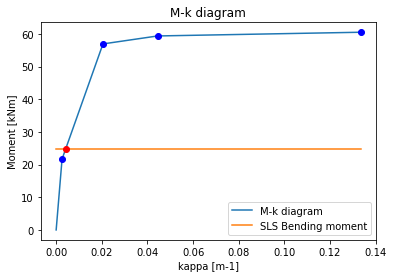

In [20]:
moments = [0,Mr,My,Mcpl,Mrd]
curvatures = [0,κr, κy, κcpl, κu]
plt.plot(curvatures,moments, label = 'M-k diagram')
plt.plot([κr, κy, κcpl, κu], [Mr,My,Mcpl,Mrd], 'bo')

MedSLSy = [MedSLS,MedSLS,MedSLS,MedSLS,MedSLS]
plt.plot(curvatures, MedSLSy, label = 'SLS Bending moment')

plt.title ('M-k diagram')
plt.xlabel ('kappa [m-1]')
plt.ylabel ('Moment [kNm]');

if MedSLS < Mr:
    x = MedSLS/(Mr/κr)
if Mr < MedSLS <My:
    x = (κy-κr)/(My-Mr)*(MedSLS-Mr+κr*(My-Mr)/(κy - κr))
if My < MedSLS < Mcpl:
    x = (κcpl-κy)/(Mcpl-My)*(MedSLS-My+κy*(Mcpl-My)/(κcpl - κy))
if Mcpl < MedSLS < Mrd:
    x = (κu-κcpl)/(Mrd-Mcpl)*(MedSLS-Mcpl+κcpl*(Mrd-Mcpl)/(κu - κcpl))

plt.plot(x,MedSLS, 'ro')
plt.legend(loc = 'best')

EI = MedSLS/x

In [21]:
print('Bending stiffness EI, at SLS load case, equals', EI , 'kNm2.')

Bending stiffness EI, at SLS load case, equals 5958.721896403963 kNm2.


#### Deflection 

In [22]:
deflection = 5/384*SLSload*(span/1000)**4/EI*1000
deflectionmax = span/250
print('The deflection in the SLS stage is', deflection, 'mm.')
UCdef = deflection/deflectionmax
print('The unity check on deflection gives an UC of:', UCdef)
if UCdef < 1:
    print(Fore.GREEN + 'The cross section is safe ✓')
else: 
    print(Fore.RED + 'The cross section is unsafe X')

The deflection in the SLS stage is 12.634836179455762 mm.
The unity check on deflection gives an UC of: 0.5849461194192482
The cross section is safe ✓


#### Crack width 

In [23]:
𝛼e = Es/Ecm
rho = As/(1000*d)
x = (-𝛼e*rho+((𝛼e*rho)**2+2*𝛼e*rho)**0.5)*d
z = d-x/3
σsr = Mr*1000000/(As*z)
hceff = min(2.5*(height-d), (height-x)/3)
rhoeff = As/(1000*hceff)
taubm = 2*fctm
σs = MedSLS*1000000/(As*z)
𝛼 = 0.3
wmax = 1/2 * fctm/taubm * rebar/ rhoeff * 1 / Es *(σs - 𝛼*σsr)

print('The maximum crack width in the SLS stage is', wmax, 'mm.') 
UCw = wmax/0.4

print('The unity check on deflection gives an UC of:', UCw)
if UCw < 1:
    print(Fore.GREEN + 'The cross section is safe ✓')
else: 
    print(Fore.RED + 'The cross section is unsafe X')

The maximum crack width in the SLS stage is 0.11987694101492817 mm.
The unity check on deflection gives an UC of: 0.2996923525373204
The cross section is safe ✓


# Environmetal impact
> In this part the environmental impact for reused and new elements are calculated and compared. 

In [24]:
sawspeed = 5.4 
hoistspeed = 1/0.24 #elements per hour 

#### Environmental impact sawing

In [25]:
amount = round(area/(width/1000*span/1000))   
hours = ((3*span/1000+4*width/1000)/2) *amount /sawspeed

MKIsawing = hours*4.7805 #Value is taken from the NMD
print('The environmental impact due to sawing is: €', MKIsawing, )

The environmental impact due to sawing is: € 187.23624999999998


#### Envrionmental impact hoisting


In [26]:
hours2 = amount*0.24 

if cranetype == 'Diesel':
    hoist = 15.935    #Value is taken from the NMD
if cranetype == 'Hybrid':
    hoist = 11.1545   #Value is taken from the NMD

MKIhoisting = hours2*hoist
print('The environmental impact due to hoisting is: €', MKIhoisting, )

The environmental impact due to hoisting is: € 57.366


#### Environmental impact new floor 

In [27]:
MKItopping = area*4.549083 #basis is NMD
MKIprefab = area*2.91808 #basis is NMD
MKInew = MKItopping+MKIprefab
print('The environmental impact of a new floor is: €', MKInew )

The environmental impact of a new floor is: € 1866.7907500000001


#   Costs 

> In this part the costs of a new and reused floor are calculated.

#### Costs new floor 

In [28]:
costnew = area*111
print('The costs of a new plank floor are: €', costnew)

The costs of a new plank floor are: € 27750


#### Cost traditional demolition 

In [29]:
costtrad = area*43.78
print('The costs of ordinary demolition are: €', costtrad)

The costs of ordinary demolition are: € 10945.0


#### Sawing costs 

In [30]:
costsaw = ((3*span/1000+4*width/1000)/2) *amount*65.5
print('The costs of sawing are: €', costsaw)

The costs of sawing are: € 13853.25


#### Hoisting costs 

In [31]:
hoistcost = amount*61.14
print('The costs of hoisting are: €', hoistcost)

The costs of hoisting are: € 917.1


#### Costs of stamping/supporting 

In [32]:
coststamp = area*8.22
print('The costs of stamping are: €', coststamp)

The costs of stamping are: € 2055.0


#### Testing costs 

In [33]:
#mapping the reinforcement
map = area*0.74

#drilling cores
cores = area/100*63

#testing
testing = area/100*70

#chopping 
chop = 10*175 

#steel
steel = 10*245 

test = map+cores+testing+chop+steel
print('The costs related to testing are: €', test)
costcirc = (costsaw+coststamp+hoistcost+test)

The costs related to testing are: € 4717.5


# Conclusion 
> This part summarises the calculations and gives the reuse potential of the floor elements.

#### Structural

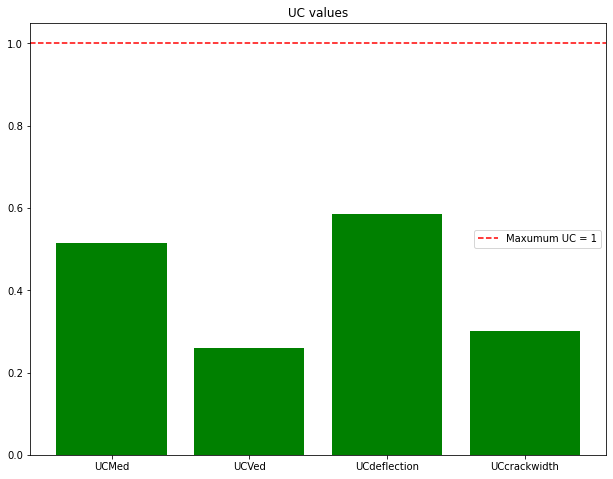

The cross section is safe ✓


In [34]:
fig = plt.figure(figsize=[8,6])
ax = fig.add_axes([0,0,1,1])
labels = ['UCMed', 'UCVed', 'UCdeflection', 'UCcrackwidth']
UCs = [UCMed, UCVed, UCdef, UCw]
plt.title('UC values')

colors = [0,0,0,0]
for i in range(len(UCs)):
    if UCs[i] < 1:
        colors[i] = 'green'
    else:
        colors[i]= 'red'
    
ax.bar(labels, UCs, color = colors)

plt.axhline(1, color = 'red', linestyle = 'dashed', label = 'Maxumum UC = 1')
plt.legend(loc = 'best')
plt.show()

if UCMed > 1 or UCVed > 1 or UCdef >1 or UCw >1:
    print(Fore.RED + 'The cross section is unsafe X')
else: 
    print(Fore.GREEN + 'The cross section is safe ✓')

#### Environmental 

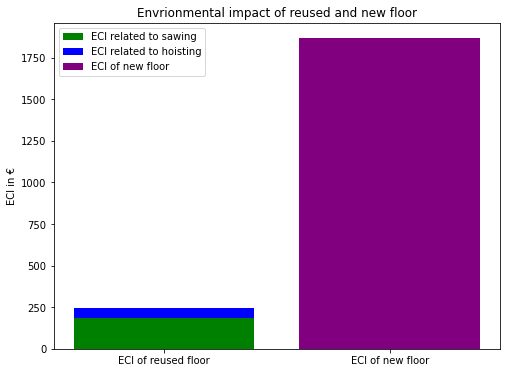

In [35]:
plt.figure(figsize=[8,6])
plt.bar([0],[MKIsawing], bottom = [0], align = 'center', color = ['green'], label = 'ECI related to sawing')
plt.bar([0],[ MKIhoisting], bottom = [MKIsawing], align = 'center', color = ['blue'], label = 'ECI related to hoisting')
plt.bar([1],[ MKInew], bottom = [0], align = 'center', color = ['purple'], label = 'ECI of new floor')

plt.xticks ([0,1] , ['ECI of reused floor', 'ECI of new floor']);
plt.ylabel ('ECI in €')
plt.title ('Envrionmental impact of reused and new floor')

plt.legend(loc='best');

In [36]:
print('The potential savings on environmental impact are: €', MKInew-MKIsawing-MKIhoisting)

The potential savings on environmental impact are: € 1622.1885000000002


#### Financial


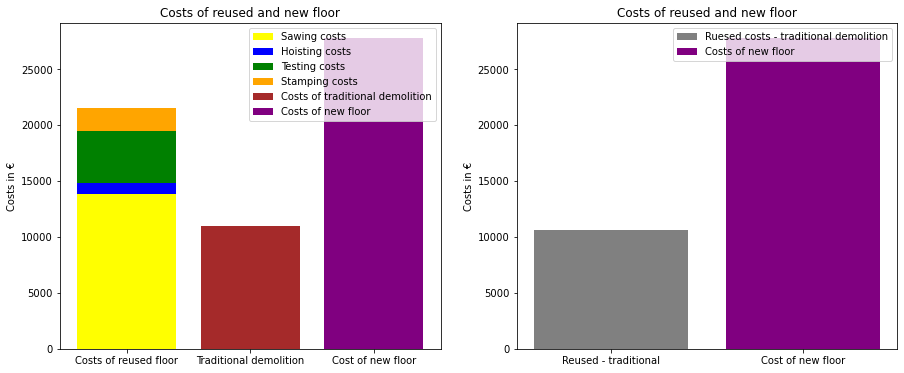

In [37]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.bar([0],[costsaw], bottom = [0], align = 'center', color = ['yellow'], label = 'Sawing costs')
plt.bar([0],[hoistcost], bottom = [costsaw], align = 'center', color = ['blue'], label = 'Hoisting costs')
plt.bar([0],[test], bottom = [costsaw+hoistcost], align = 'center', color = ['green'], label = 'Testing costs')
plt.bar([0],[coststamp], bottom = [costsaw+hoistcost+test], align = 'center', color = ['orange'], label = 'Stamping costs')
plt.bar([1],[costtrad], bottom = [0], align = 'center', color = ['brown'], label = 'Costs of traditional demolition')
plt.bar([2],[costnew], bottom = [0], align = 'center', color = ['purple'], label = 'Costs of new floor')

plt.xticks ([0,1,2] , ['Costs of reused floor', 'Traditional demolition', 'Cost of new floor']);
plt.ylabel ('Costs in €')
plt.title ('Costs of reused and new floor')
plt.legend(loc='best');

plt.subplot(1,2,2)
plt.bar([0],[costsaw+hoistcost+test+coststamp-costtrad], bottom = [0], align = 'center', color = ['grey'], label = 'Ruesed costs - traditional demolition')
plt.bar([1],[costnew], bottom = [0], align = 'center', color = ['purple'], label = 'Costs of new floor')

plt.xticks ([0,1,] , ['Reused - traditional', 'Cost of new floor']);
plt.ylabel ('Costs in €')
plt.title ('Costs of reused and new floor')
plt.legend(loc='best');

In [38]:
print('The needed investment costs when comparing a reused floor with a new one are: €', costsaw+hoistcost+test-costnew)
print('The needed investment costs when comparing a reused floor and the traditional demolition costs (discount) with a new floor are: €', costsaw+hoistcost+test+coststamp-costnew-costtrad)

The needed investment costs when comparing a reused floor with a new one are: € -8262.150000000001
The needed investment costs when comparing a reused floor and the traditional demolition costs (discount) with a new floor are: € -17152.15


#### Potential benefit

In [39]:
print('The potential benefit on environmental impact and costs is: €',MKInew-MKIsawing-MKIhoisting-(costsaw+hoistcost+test+coststamp-costnew-costtrad) )

The potential benefit on environmental impact and costs is: € 18774.3385


In [40]:
conda env export > environment.yaml


Note: you may need to restart the kernel to use updated packages.
